# Manipulating word embeddings 

In this week's assignment, you are going to use a pre-trained word embedding for finding word analogies and equivalence. This exercise can be used as an Intrinsic Evaluation for the word embedding performance. In this notebook, you will apply linear algebra operations using NumPy to find analogies between words manually. This will help you to prepare for this week's assignment.

In [1]:
import pandas as pd # Library for Dataframes 
import numpy as np # Library for math functions
import pickle # Python object serialization library. Not secure

word_embeddings = pickle.load( open( "word_embeddings_subset.p", "rb" ) )
len(word_embeddings) # there should be 243 words that will be used in this assignment

243

Now that the model is loaded, we can take a look at the word representations. First, note that the _word_embeddings_ is a dictionary. Each word is the key to the entry, and the value is its corresponding vector presentation. Remember that square brackets allow access to any entry if the key exists. 

In [3]:
countryVector = word_embeddings['country'] # Get the vector representation for the word 'country'
print(type(countryVector)) # Print the type of the vector. Note it is a numpy array
print(countryVector) # Print the values of the vector.  
print(len(countryVector))  # 语料库的大小为300

<class 'numpy.ndarray'>
[-0.08007812  0.13378906  0.14355469  0.09472656 -0.04736328 -0.02355957
 -0.00854492 -0.18652344  0.04589844 -0.08154297 -0.03442383 -0.11621094
  0.21777344 -0.10351562 -0.06689453  0.15332031 -0.19335938  0.26367188
 -0.13671875 -0.05566406  0.07470703 -0.00070953  0.09375    -0.14453125
  0.04296875 -0.01916504 -0.22558594 -0.12695312 -0.0168457   0.05224609
  0.0625     -0.1484375  -0.01965332  0.17578125  0.10644531 -0.04760742
 -0.10253906 -0.28515625  0.10351562  0.20800781 -0.07617188 -0.04345703
  0.08642578  0.08740234  0.11767578  0.20996094 -0.07275391  0.1640625
 -0.01135254  0.0025177   0.05810547 -0.03222656  0.06884766  0.046875
  0.10107422  0.02148438 -0.16210938  0.07128906 -0.16210938  0.05981445
  0.05102539 -0.05566406  0.06787109 -0.03759766  0.04345703 -0.03173828
 -0.03417969 -0.01116943  0.06201172 -0.08007812 -0.14941406  0.11914062
  0.02575684  0.00302124  0.04711914 -0.17773438  0.04101562  0.05541992
  0.00598145  0.03027344 -0.07

It is important to note that we store each vector as a NumPy array. It allows us to use the linear algebra operations on it. 

The vectors have a size of 300, while the vocabulary size of Google News is around 3 million words! 

In [4]:
#Get the vector for a given word:
def vec(w):
    return word_embeddings[w]

## Operating on word embeddings

Remember that understanding the data is one of the most critical steps in Data Science. Word embeddings are the result of machine learning processes and will be part of the input for further processes. These word embedding needs to be validated or at least understood because the performance of the derived model will strongly depend on its quality.

Word embeddings are multidimensional arrays, usually with hundreds of attributes that pose a challenge for its interpretation. 

In this notebook, we will visually inspect the word embedding of some words using a pair of attributes. Raw attributes are not the best option for the creation of such charts but will allow us to illustrate the mechanical part in Python. 

In the next cell, we make a beautiful plot for the word embeddings of some words. Even if plotting the dots gives an idea of the words, the arrow representations help to visualize the vector's alignment as well.

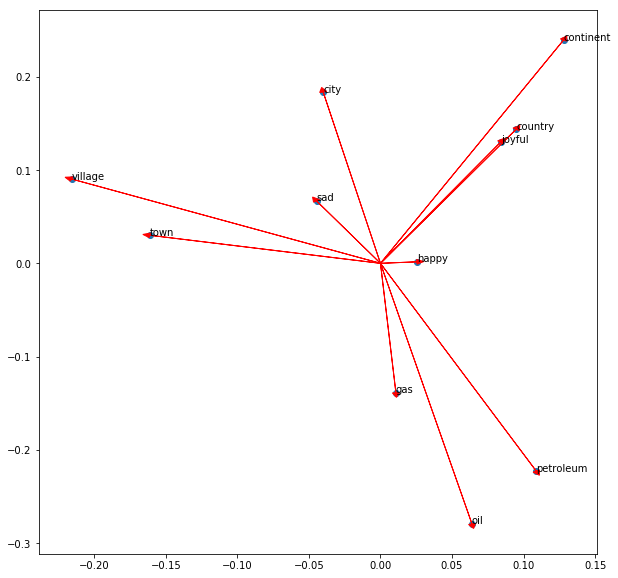

In [6]:
import matplotlib.pyplot as plt # Import matplotlib

words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']

bag2d = np.array([vec(word) for word in words]) # Convert each word to its vector representation

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

col1 = 3 # Select the column for the x axis
col2 = 2 # Select the column for the y axis

# Print an arrow for each word
for word in bag2d:
    ax.arrow(0, 0, word[col1], word[col2], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

    
ax.scatter(bag2d[:, col1], bag2d[:, col2]); # Plot a dot for each word

# Add the word label over each dot in the scatter plot
for i in range(0, len(words)):
    ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))


plt.show()

Note that similar words like 'village' and 'town' or 'petroleum', 'oil', and 'gas' tend to point in the same direction. Also, note that 'sad' and 'happy' looks close to each other; however, the vectors point in opposite directions.

In this chart, one can figure out the angles and distances between the words. Some words are close in both kinds of distance metrics.

## Word distance

Now plot the words 'sad', 'happy', 'town', and 'village'. In this same chart, display the vector from 'village' to 'town' and the vector from 'sad' to 'happy'. Let us use NumPy for these linear algebra operations.

In [ ]:
words = ['sad', 'happy', 'town', 'village']

bag2d = np.array([vec(word) for word in words]) # Convert each word to its vector representation

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

col1 = 3 # Select the column for the x axe
col2 = 2 # Select the column for the y axe

# Print an arrow for each word
for word in bag2d:
    ax.arrow(0, 0, word[col1], word[col2], head_width=0.0005, head_length=0.0005, fc='r', ec='r', width = 1e-5)
    
# print the vector difference between village and town
village = vec('village')
town = vec('town')
diff = town - village
ax.arrow(village[col1], village[col2], diff[col1], diff[col2], fc='b', ec='b', width = 1e-5)

# print the vector difference between village and town
sad = vec('sad')
happy = vec('happy')
diff = happy - sad
ax.arrow(sad[col1], sad[col2], diff[col1], diff[col2], fc='b', ec='b', width = 1e-5)


ax.scatter(bag2d[:, col1], bag2d[:, col2]); # Plot a dot for each word

# Add the word label over each dot in the scatter plot
for i in range(0, len(words)):
    ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))


plt.show()


## Linear algebra on word embeddings

In the lectures, we saw the analogies between words using algebra on word embeddings. Let us see how to do it in Python with Numpy.

To start, get the **norm** of a word in the word embedding.

In [ ]:
print(np.linalg.norm(vec('town'))) # Print the norm of the word town
print(np.linalg.norm(vec('sad'))) # Print the norm of the word sad

## Predicting capitals

Now, applying vector difference and addition, one can create a vector representation for a new word. For example, we can say that the vector difference between 'France' and 'Paris' represents the concept of Capital.

One can move from the city of Madrid in the direction of the concept of Capital, and obtain something close to the corresponding country to which Madrid is the Capital.

In [ ]:
capital = vec('France') - vec('Paris')
country = vec('Madrid') + capital

print(country[0:5]) # Print the first 5 values of the vector

We can observe that the vector 'country' that we expected to be the same as the vector for Spain is not exactly it.

In [ ]:
diff = country - vec('Spain')
print(diff[0:10])

So, we have to look for the closest words in the embedding that matches the candidate country. If the word embedding works as expected, the most similar word must be 'Spain'. Let us define a function that helps us to do it. We will store our word embedding as a DataFrame, which facilitate the lookup operations based on the numerical vectors.

In [ ]:
# Create a dataframe out of the dictionary embedding. This facilitate the algebraic operations
keys = word_embeddings.keys()
data = []
for key in keys:
    data.append(word_embeddings[key])

embedding = pd.DataFrame(data=data, index=keys)
# Define a function to find the closest word to a vector:
def find_closest_word(v, k = 1):
    # Calculate the vector difference from each word to the input vector
    diff = embedding.values - v 
    # Get the norm of each difference vector. 
    # It means the squared euclidean distance from each word to the input vector
    delta = np.sum(diff * diff, axis=1)
    # Find the index of the minimun distance in the array
    i = np.argmin(delta)
    # Return the row name for this item
    return embedding.iloc[i].name


In [ ]:
# Print some rows of the embedding as a Dataframe
embedding.head(10)

Now let us find the name that corresponds to our numerical country:

In [ ]:
find_closest_word(country)

## Predicting other Countries

In [ ]:
find_closest_word(vec('Italy') - vec('Rome') + vec('Madrid'))

In [ ]:
print(find_closest_word(vec('Berlin') + capital))
print(find_closest_word(vec('Beijing') + capital))

However, it does not always work.

In [ ]:
print(find_closest_word(vec('Lisbon') + capital))

## Represent a sentence as a vector

A whole sentence can be represented as a vector by summing all the word vectors that conform to the sentence. Let us see. 

In [ ]:
doc = "Spain petroleum city king"
vdoc = [vec(x) for x in doc.split(" ")]
doc2vec = np.sum(vdoc, axis = 0)
doc2vec

In [ ]:
find_closest_word(doc2vec)

**Congratulations! You have finished the introduction to word embeddings manipulation!**